In [12]:
import pandas as pd
import numpy as np

import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
new = pd.read_csv(r"C:\Users\GENIUS\Desktop\Machine Learning\LInear Regression Assignment\Fish_dataset.csv") 


new.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
new

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:xlabel='Species', ylabel='Weight'>

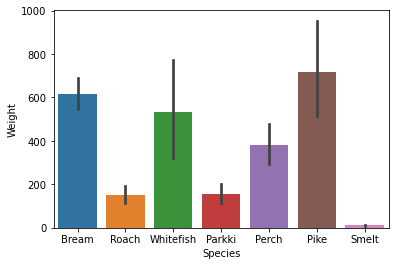

In [5]:
sns.barplot(x='Species',y='Weight',data=new)

# 1 Plot a bar chart showing count of individual species?

In [1]:
new['Species'].value_counts().plot.bar

NameError: name 'new' is not defined

# 2.Identify outliers and remove if any?

In [17]:
new.apply(LabelEncoder().fit_transform) 

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,46,47,45,60,108,65
1,0,53,51,48,65,118,75
2,0,57,50,49,64,114,88
3,0,59,58,55,67,123,80
4,0,61,59,55,68,117,101
...,...,...,...,...,...,...,...
154,5,10,9,9,8,5,10
155,5,11,10,10,9,11,5
156,5,10,11,11,10,10,4
157,5,12,14,14,12,12,14


<AxesSubplot:>

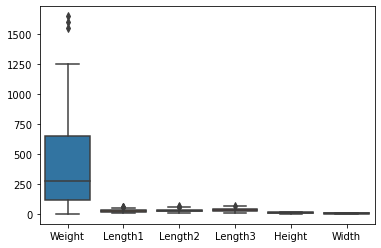

In [19]:
sns.boxplot(data=new)

In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [14]:
def remove_outliers(new):
    for i in new.columns:
        q1=new[i].quantile(0.25)
        q3=new[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((new[i].dtype=='float64') |  (new[i].dtype=='int64')):
            new[i][new[i]>=upper_limit]=upper_limit
            new[i][new[i]<=lower_limit]=lower_limit
        else:
            new[i]=new[i]
    return new

remove_outliers(new)      

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [15]:
x=new.drop(['Weight'],axis=1)
y=new['Weight']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=112)

In [16]:
new1=pd.concat([y_train,x_train],axis=1)
new1

,Weight,Species,Length1,Length2,Length3,Height,Width
83,115.0,Perch,19.0,21.0,22.5,5.9175,3.3075
67,170.0,Parkki,19.0,20.7,23.2,9.3960,3.4104
93,145.0,Perch,20.7,22.7,24.2,5.9532,3.6300
2,340.0,Bream,23.9,26.5,31.1,12.3778,4.6961
112,685.0,Perch,34.0,36.5,39.0,10.8810,6.8640
...,...,...,...,...,...,...,...
48,169.0,Roach,22.0,24.0,27.2,7.5344,3.8352
148,9.7,Smelt,10.4,11.0,12.0,2.1960,1.3800
40,0.0,Roach,19.0,20.5,22.8,6.4752,3.3516
65,150.0,Parkki,18.4,20.0,22.4,8.8928,3.2928


In [17]:
new1.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.925817,0.928148,0.929998,0.703876,0.870728
Length1,0.925817,1.000000,0.999550,0.992652,0.632026,0.866487
Length2,0.928148,0.999550,1.000000,0.994583,0.646032,0.872341
Length3,0.929998,0.992652,0.994583,1.000000,0.705469,0.875399
Height,0.703876,0.632026,0.646032,0.705469,1.000000,0.790609
Width,0.870728,0.866487,0.872341,0.875399,0.790609,1.000000


<AxesSubplot:>

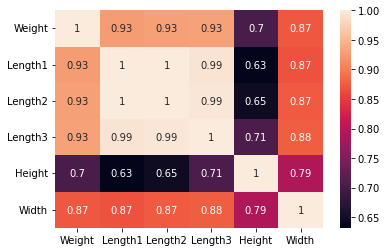

In [18]:
sns.heatmap(new1.corr(),annot=True)

# Assumption of model

<AxesSubplot:xlabel='Length1', ylabel='Weight'>

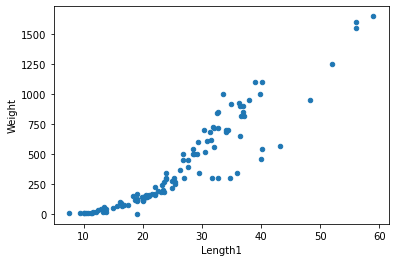

In [19]:
new1.plot.scatter(x='Length1',y='Weight')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

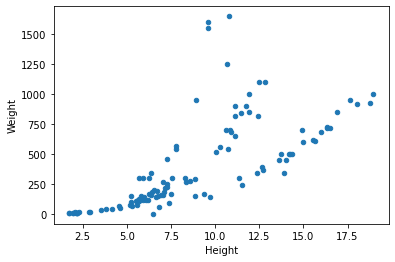

In [20]:
new1.plot.scatter(x='Height',y='Weight')

In [21]:
new1['fitted_values']=model.fittedvalues
new1['residual']=model.resid
new1.head()

NameError: name 'model' is not defined

In [22]:
sns.scatterplot(x='fitted_values',y='residual',data=new1)

ValueError: Could not interpret value `fitted_values` for parameter `x`